In [1]:
import numpy as np
import tqdm
from matplotlib import animation
import time
from gridworld import MarkovGridWorld, OranbeBlue, SarsaGridWorld
import matplotlib.pyplot as plt

The Hyperparamters

In [2]:
BASE_PARAMETERS ={
    "n_cols": 6,
    "n_rows": 6,
    "walls": [(2, 2), (1, 3), (1, 4), (3, 2)],
    "traps": [(5, 2), (2,4), (1,2), (5,5)],
    "start": (0, 0),
    "goal": (2,3),
    "cost_per_step": 0.05,
    "goal_reward": 3,
    "trap_reward": -1,
    "probality_wrong_step": 0.05
    }

AGENT_PARAMETERS ={
    "epsilon" :0.2,
    "epsilon_anealing_factor" :0.99,
    "max_steps_per_episode"  : 200,
    "gamma" : 0.95
}    

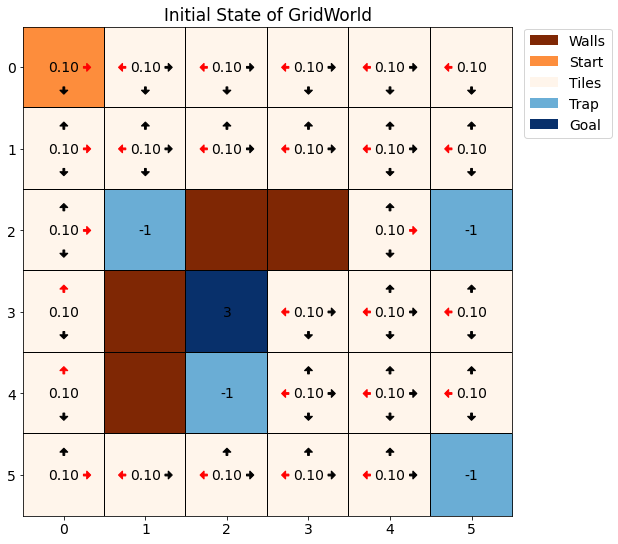

100%|██████████| 2000/2000 [00:00<00:00, 2442.84it/s]


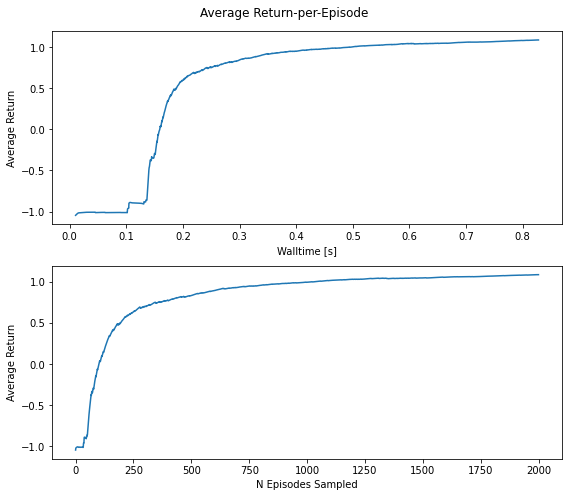

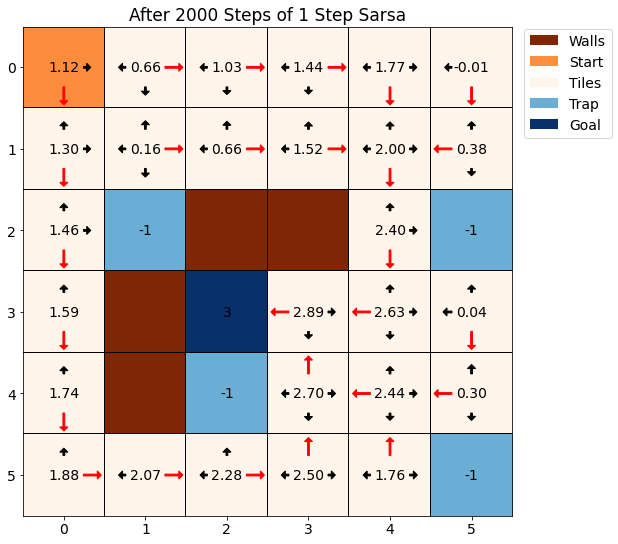

In [3]:
mdp = SarsaGridWorld(BASE_PARAMETERS,
                     alpha = 0.05,
                     n_steps_sarsa = 1,
                     **AGENT_PARAMETERS) 
mdp.visualize()

rewards = []
walltimes = []

start_time = time.time()

for i in tqdm.tqdm(range(2000)):

    mdp.step()
    rewards.append(mdp.average_return_per_episode())
    walltimes.append(time.time() - start_time)


plt.figure(figsize=((8, 7)))
plt.subplot(2, 1, 1)
plt.ylabel("Average Return")
plt.xlabel("Walltime [s]")
plt.plot(walltimes, rewards)
plt.subplot(2, 1, 2)
plt.ylabel("Average Return")
plt.plot(rewards)
plt.xlabel("N Episodes Sampled")
plt.suptitle("Average Return-per-Episode")
plt.tight_layout()
plt.savefig("imgs/sarsa_episode_return_overtime.jpeg")
plt.show()

mdp.visualize(r"After 2000 Steps of 1 Step Sarsa",
              savefig="imgs/sarsa_field.jpeg")


Doing Policy Iterations: 100%|██████████| 1000/1000 [00:00<00:00, 1907.72it/s]


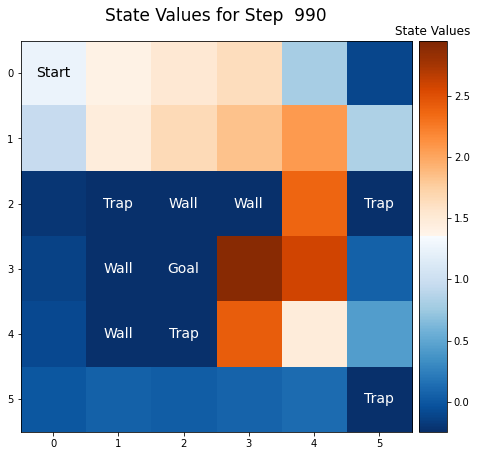

In [6]:
mdp = SarsaGridWorld(BASE_PARAMETERS,
                     alpha = 0.05,
                     n_steps_sarsa = 1,
                     **AGENT_PARAMETERS) 

ani = mdp.animate_values(15, 1000)
ani.save("videos/sarsa.mp4", savefig_kwargs={"facecolor": (1, 1, 1, 1)})
ani.save("videos/sarsa.gif", savefig_kwargs={"facecolor": (1, 1, 1, 1)})


In [7]:
from IPython.display import Video
Video('videos/sarsa.mp4')

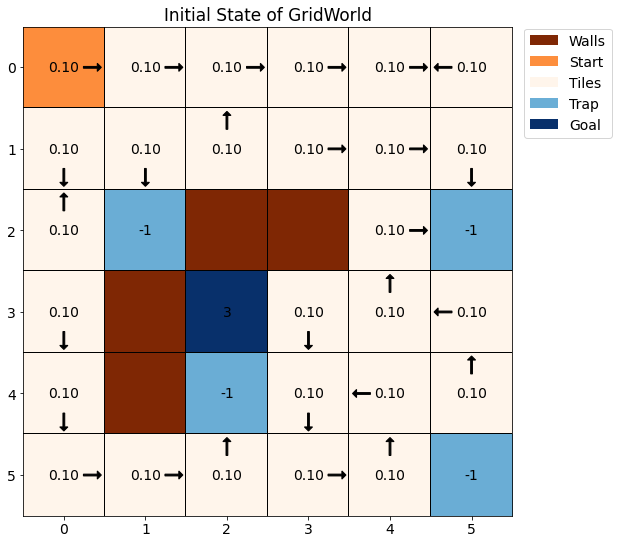

100%|██████████| 2000/2000 [00:00<00:00, 6708.21it/s]


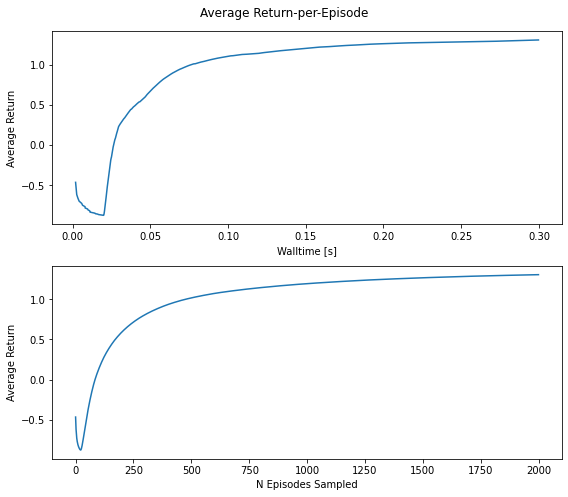

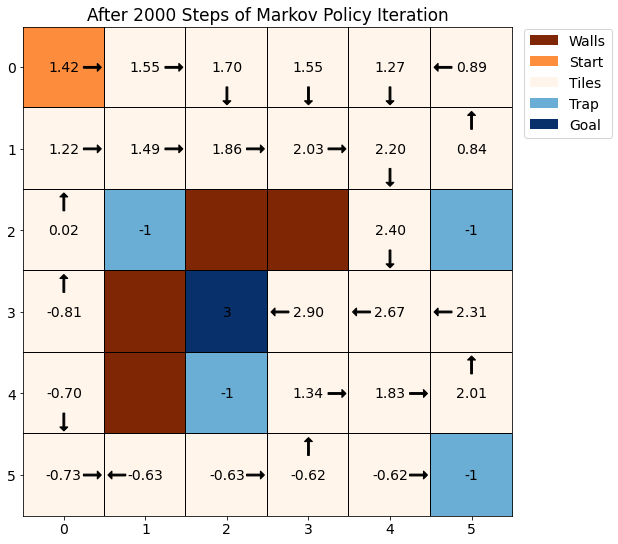

In [9]:
mdp = MarkovGridWorld(BASE_PARAMETERS,
                     **AGENT_PARAMETERS) 
mdp.visualize()


rewards = []
walltimes = []

start_time = time.time()

for i in tqdm.tqdm(range(2000)):
    
    mdp.step()
    rewards.append(mdp.average_return_per_episode())
    walltimes.append(time.time() - start_time)


plt.figure(figsize=((8, 7)))
plt.subplot(2, 1, 1)
plt.ylabel("Average Return")
plt.xlabel("Walltime [s]")
plt.plot(walltimes, rewards)
plt.subplot(2, 1, 2)
plt.ylabel("Average Return")
plt.plot(rewards)
plt.xlabel("N Episodes Sampled")
plt.suptitle("Average Return-per-Episode")
plt.tight_layout()
plt.savefig("imgs/markov_episode_return_overtime.jpeg")
plt.show()

mdp.visualize(r"After 2000 Steps of Markov Policy Iteration", savefig= "imgs/markov_field.jpeg")

Doing Policy Iterations: 100%|██████████| 1000/1000 [00:00<00:00, 3056.46it/s]


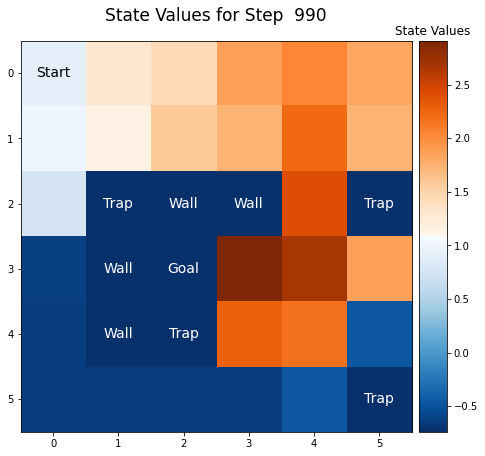

In [24]:
mdp = MarkovGridWorld(BASE_PARAMETERS,
                     **AGENT_PARAMETERS) 

ani = mdp.animate_values(15, 1000)
ani.save("videos/markov.mp4", savefig_kwargs={"facecolor": (1, 1, 1, 1)})
ani.save("videos/markov.gif", savefig_kwargs={"facecolor": (1, 1, 1, 1)})

In [8]:
from IPython.display import Video
Video('videos/markov.mp4')